In [1]:
import numpy as np
from pyscf import gto, scf, dft

from pyscf.tools.dump_mat import dump_rec
from sys import stdout

from sys import path
path.append("..")

from pop_scheme import FrgPopulationScheme, FrgMullikenPopulation
from rdft       import Constraints, rdft

mol = gto.Mole()
mol.verbose = 0
mol.atom = '''
O  -1.551007  -0.114520   0.000000
H  -1.934259   0.762503   0.000000
H  -0.599677   0.040712   0.000000
O   1.350625   0.111469   0.000000
H   1.680398  -0.373741  -0.758561
H   1.680398  -0.373741   0.758561
'''

mol.basis = '6-31g(d)'
mol.cart  = True
mol.spin   = 0
mol.charge = 0
mol.build()

In [2]:
kk = 40
pop1_list    = np.zeros(kk)
e_add1_list  = np.zeros(kk)
etot_1_list  = np.zeros(kk)
lams_1_list  = np.zeros(kk)
omega_list   = np.linspace(0,100.0,kk)

mf           = scf.RHF(mol)
mf.conv_tol  = 1e-9
mf.verbose   = 0
mf.max_cycle = 100
mf.kernel()
dm = mf.make_rdm1()
etot_0 = mf.e_tot
pop = mf.mulliken_pop(verbose=0)[1]
pop0 = pop[0] + pop[1] + pop[2]
print("pop0 = {: 12.6f}".format(pop0))

old_get_fock       = mf.get_fock
old_energy_elec    = mf.energy_elec

frg_list            = [[0,1,2],[3,4,5]]
nelec_required_list = [[10.0], [10.0]]
    
for iomega, omega in enumerate(omega_list):
    mf           = scf.RHF(mol)
    mf.conv_tol  = 1e-9
    mf.verbose   = 0
    mf.max_cycle = 100
    mf.kernel()
    dm = mf.make_rdm1()

    omega_vals          = [[omega],[0.0]]
    e_add               = rdft(mf, frg_list, nelec_required_list, omega_vals, dm0=dm, verbose=3, maxiter=50, tol=1e-9,
                              old_energy_elec=old_energy_elec, old_get_fock=old_get_fock)
    pop                 = mf.mulliken_pop(verbose=0)[1]
    pop1                = pop[0]+pop[1]+pop[2]
    pop1_list[iomega]   = pop1
    e_add1_list[iomega] = e_add
    etot_1_list[iomega] = mf.e_tot - etot_0
    lams_1_list[iomega] = -e_add/pop1*2

    print("omega = {: 12.6f}, e_tot-e_tot0 = {: 12.6f}, e_add = {: 12.6f}, pop = {: 12.6f}, lambda = {: 12.6f}".format(
        omega, mf.e_tot - etot_0, e_add, pop1, -e_add/pop1*2
    ))
    print("")

pop0 =    -0.028196
converged SCF energy = -152.029828966588
omega =     0.000000, e_tot-e_tot0 =    -0.000000, e_add =     0.000000, pop =    -0.028196, lambda =     0.000000



Overwritten attributes  energy_elec get_fock  of <class 'pyscf.scf.hf.RHF'>


converged SCF energy = -152.029390852695
omega =     2.564103, e_tot-e_tot0 =     0.000438, e_add =     0.000192, pop =    -0.012228, lambda =     0.031354

converged SCF energy = -152.029267342249
omega =     5.128205, e_tot-e_tot0 =     0.000562, e_add =     0.000159, pop =    -0.007883, lambda =     0.040426

converged SCF energy = -152.0292084855
omega =     7.692308, e_tot-e_tot0 =     0.000620, e_add =     0.000130, pop =    -0.005824, lambda =     0.044802

converged SCF energy = -152.02917398326
omega =    10.256410, e_tot-e_tot0 =     0.000655, e_add =     0.000110, pop =    -0.004621, lambda =     0.047396

converged SCF energy = -152.029151296382
omega =    12.820513, e_tot-e_tot0 =     0.000678, e_add =     0.000094, pop =    -0.003834, lambda =     0.049150

converged SCF energy = -152.029135237915
omega =    15.384615, e_tot-e_tot0 =     0.000694, e_add =     0.000083, pop =    -0.003281, lambda =     0.050477

converged SCF energy = -152.029123273671
omega =    17.948718

In /Users/yangjunjie/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/yangjunjie/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/yangjunjie/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/yangjunjie/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/yangjunjie/opt

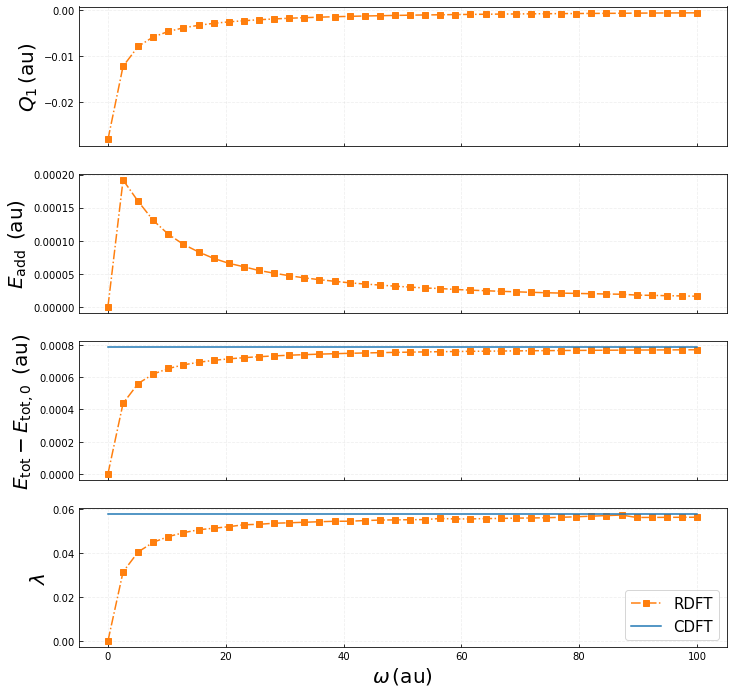

In [3]:
import matplotlib as mpl
from   matplotlib import pyplot as plt

style_dict = {
    '1': dict(linestyle='-.',  marker='s', color='C1',  markersize=6, markevery=1, label=r"RDFT"),
    '2': dict(linestyle='-.',  marker='*', color='C2',  markersize=10, markevery=1, label=r"$(2\omega, 0.0)$"),
    '3': dict(linestyle='-.',  marker='o', color='C3',  markersize=6, markevery=1, label=r"$RDFT$")
}

params = {
        "axes.titlesize":  10, 
        "axes.labelsize":  20, 
        "legend.fontsize": 15,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10, 
        "xtick.direction":'in', 
        "ytick.direction":'in' 
}
mpl.rcParams.update(**params)

k        = kk
tmp_list1 = [0.0007877027000233738 for _ in range(k)]
tmp_list2 = [0.0574943538660819 for _ in range(k)]
fig1, ax1 = plt.subplots(4,1,figsize=(10,10),sharex=True)
fig1.subplots_adjust(left=0.09, bottom=0.1, right=0.99, top=0.99, wspace=0.1)

ax1[0].plot(omega_list[:k], pop1_list[:k],              **style_dict['1'])
ax1[1].plot(omega_list[:k], e_add1_list[:k],            **style_dict['1'])
ax1[2].plot(omega_list[:k], etot_1_list[:k],            **style_dict['1'])
ax1[2].plot(omega_list[:k], tmp_list1)
ax1[3].plot(omega_list[:k], lams_1_list[:k],            **style_dict['1'])
ax1[3].plot(omega_list[:k], tmp_list2, label=r"CDFT")

props = {'ylabel':r'$Q_1\,$(au)'}
ax1[0].grid(linestyle="--", alpha=0.2)
ax1[0].set(**props)

props = {'ylabel':r'$E_\mathrm{add}\,$ (au)'}
ax1[1].grid(linestyle="--", alpha=0.2)
ax1[1].set(**props)

props = {'ylabel':r'$E_\mathrm{tot}-E_\mathrm{tot,0}\,$ (au)'}
ax1[2].grid(linestyle="--", alpha=0.2)
ax1[2].set(**props)

props = {'ylabel':r'$\lambda$', 'xlabel':r'$\omega\,$(au)'}
ax1[3].legend(loc='lower right')
ax1[3].grid(linestyle="--", alpha=0.2)
ax1[3].set(**props);

In [4]:
-151.961472701 + 152.0298289652

0.06835626420001972